# Clasification problem: 
### Assigning income level to country based on features and year
By: Xavier Torres

In the project held by Omdena and the World Food Program that aimed to ceate an AI-based tool for predicting affected peopleand package response after a cyclone strikes (food and non-food items), several World Bank Indicators were added to the cyclones datset in order to have more information on the data and the country affected historically.  

<img src="https://cdn.pixabay.com/photo/2018/08/18/09/44/stairs-3614468__340.jpg" width="800"/>

Income Level classification is assigned by World Bank. Levels are 
- Low
- Low_middle
- Middle-High
- High

World Bank data has only values of **Income Level Classification** for the present time (2010++). 
Based on existing dataset and indicators, we will build a classifier that can be applied to predict *Income Level* for any year since 1960 for any country.

## 1. Uploading and reformatting dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Importing WBI Dataset (the final and cleaned one, called OUTPUT....)
df = pd.read_csv('Data_output/WBI_final.csv',sep=";", low_memory = False)

In [3]:
df.head()

,Year,Country Code,Country Name,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population)
0,1949,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471
1,1950,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471
2,1951,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471
3,1952,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471
4,1953,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471


In [4]:
# uploading dataset that contains recent income level category per country
IL_recent = pd.read_csv('Data_input/Income_level_recent.csv', sep=';', low_memory = False)

In [5]:
IL_recent.head()

,Country Code,Income_level_recent
0,ABW,High
1,AFG,Low
2,AGO,Low_Middle
3,ALB,High_Middle
4,AND,High


In [6]:
df= pd.merge(df, IL_recent, how='left', left_on=['Country Code'], right_on=['Country Code'])

In [7]:
df.head()

,Year,Country Code,Country Name,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_recent
0,1949,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471,High
1,1950,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471,High
2,1951,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471,High
3,1952,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471,High
4,1953,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471,High


In [8]:
df['id'] = df["Country Code"]+ df["Year"].astype(str)

In [9]:
df.set_index('id', inplace = True)

In [10]:
df.head()

,Year,Country Code,Country Name,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_recent
id,,,,,,,,,,,,,,,,
AUS1949,1949,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471,High
AUS1950,1950,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471,High
AUS1951,1951,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471,High
AUS1952,1952,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471,High
AUS1953,1953,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471,High


## 2. Building the classifier using Random Forest

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df.shape

(4473, 16)

In [13]:
df.isna().sum()

Year                                                      0
Country Code                                              0
Country Name                                              0
Air transport, freight (million ton-km)                2184
Arable land (hectares per person)                        71
Cereal yield (kg per hectare)                           426
Food production index (2004-2006 = 100)                  71
GDP growth (annual %)                                  1299
GDP per capita (constant 2010 US$)                      213
Net flows from UN agencies US$                            0
Life expectancy at birth, total (years)                  71
Mobile cellular subscriptions (per 100 people)          693
Population density (people per sq. km of land area)       0
Adjusted savings: education expenditure (% of GNI)      213
Rural population (% of total population)                  0
Income_level_recent                                       0
dtype: int64

In [14]:
# We'll create a new df2 to work with
df2 = df.fillna(df.mean()) #as there are some missing values, well fill them with mean()

In [15]:
#Selecting only rows with years >= 2010 to build the classifier, because the income_level is only accurate for recent years

df_recent = df2[df2['Year'] >= 2010]
df_recent.head()

,Year,Country Code,Country Name,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_recent
id,,,,,,,,,,,,,,,,
AUS2010,2010,AUS,Australia,2938.314378,1.932121,1661.5,96.01,2.067466,52022.12560,0.0,81.695122,101.558682,2.867859,5.080000,14.818,High
AUS2011,2011,AUS,Australia,2846.598798,2.134196,2097.5,102.35,2.462786,52567.77724,0.0,81.895122,105.550621,2.907986,4.850000,14.700,High
AUS2012,2012,AUS,Australia,2731.697980,2.072407,2231.6,108.39,3.918162,53682.04722,0.0,82.046341,106.261156,2.959200,5.050000,14.598,High
AUS2013,2013,AUS,Australia,1984.693734,1.998389,1936.1,108.59,2.584875,54129.93905,0.0,82.148780,107.246155,3.010574,4.945024,14.498,High
AUS2014,2014,AUS,Australia,1925.772009,2.000240,2137.9,109.14,2.533115,54679.42018,0.0,82.300000,106.202533,3.055815,4.840048,14.398,High


In [16]:
X = df_recent[df_recent.columns[3:15]]  # Features
y = df_recent['Income_level_recent']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) # 70% training and 30% test

In [17]:
X.head()

,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population)
id,,,,,,,,,,,,
AUS2010,2938.314378,1.932121,1661.5,96.01,2.067466,52022.12560,0.0,81.695122,101.558682,2.867859,5.080000,14.818
AUS2011,2846.598798,2.134196,2097.5,102.35,2.462786,52567.77724,0.0,81.895122,105.550621,2.907986,4.850000,14.700
AUS2012,2731.697980,2.072407,2231.6,108.39,3.918162,53682.04722,0.0,82.046341,106.261156,2.959200,5.050000,14.598
AUS2013,1984.693734,1.998389,1936.1,108.59,2.584875,54129.93905,0.0,82.148780,107.246155,3.010574,4.945024,14.498
AUS2014,1925.772009,2.000240,2137.9,109.14,2.533115,54679.42018,0.0,82.300000,106.202533,3.055815,4.840048,14.398


In [18]:
y.head()

id
AUS2010    High
AUS2011    High
AUS2012    High
AUS2013    High
AUS2014    High
Name: Income_level_recent, dtype: object

In [19]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [20]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [21]:
labels = ['Low', 'Low_Middle', 'High_Middle','High']

In [22]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels = labels))

In [23]:
cm.head()

,0,1,2,3
0,17,0,0,0
1,0,52,0,0
2,0,0,67,0
3,0,0,0,53


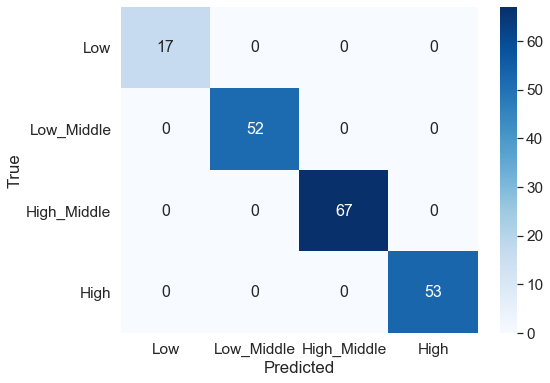

In [24]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, cmap="Blues", annot_kws={"size": 16},
           xticklabels=labels, yticklabels= labels) # font size

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
importances = clf.feature_importances_

In [26]:
cols = X.columns

In [27]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]



Feature ranking:
1. feature 5 (0.313146) GDP per capita (constant 2010 US$)
2. feature 7 (0.151687) Life expectancy at birth, total (years)
3. feature 11 (0.127955) Rural population (% of total population)
4. feature 1 (0.073011) Arable land (hectares per person)
5. feature 6 (0.066634) Net flows from UN agencies US$
6. feature 8 (0.059568) Mobile cellular subscriptions (per 100 people)
7. feature 2 (0.042716) Cereal yield (kg per hectare)
8. feature 9 (0.040729) Population density (people per sq. km of land area)
9. feature 10 (0.040163) Adjusted savings: education expenditure (% of GNI)
10. feature 3 (0.033999) Food production index (2004-2006 = 100)
11. feature 4 (0.028237) GDP growth (annual %)
12. feature 0 (0.022156) Air transport, freight (million ton-km)


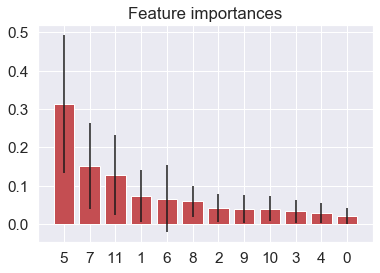

In [28]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]), cols[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## 3. Generating predicted *Income_level* column in df

In [29]:
df_features = df2[df2.columns[3:15]] #selectiong df with features

In [30]:
df_features.head()

,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population)
id,,,,,,,,,,,,
AUS1949,1256.47692,2.879424,1083.9,36.64,4.085758,19378.37079,0.0,70.817073,23.967786,1.364565,4.981227,18.471
AUS1950,1256.47692,2.879424,1083.9,36.64,4.085758,19378.37079,0.0,70.817073,23.967786,1.364565,4.981227,18.471
AUS1951,1256.47692,2.879424,1083.9,36.64,4.085758,19378.37079,0.0,70.817073,23.967786,1.364565,4.981227,18.471
AUS1952,1256.47692,2.879424,1083.9,36.64,4.085758,19378.37079,0.0,70.817073,23.967786,1.364565,4.981227,18.471
AUS1953,1256.47692,2.879424,1083.9,36.64,4.085758,19378.37079,0.0,70.817073,23.967786,1.364565,4.981227,18.471


In [31]:
df2['Pred_Income_level'] = clf.predict(df_features)

In [32]:
df2.head()

,Year,Country Code,Country Name,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_recent,Pred_Income_level
id,,,,,,,,,,,,,,,,,
AUS1949,1949,AUS,Australia,1256.47692,2.879424,1083.9,36.64,4.085758,19378.37079,0.0,70.817073,23.967786,1.364565,4.981227,18.471,High,High
AUS1950,1950,AUS,Australia,1256.47692,2.879424,1083.9,36.64,4.085758,19378.37079,0.0,70.817073,23.967786,1.364565,4.981227,18.471,High,High
AUS1951,1951,AUS,Australia,1256.47692,2.879424,1083.9,36.64,4.085758,19378.37079,0.0,70.817073,23.967786,1.364565,4.981227,18.471,High,High
AUS1952,1952,AUS,Australia,1256.47692,2.879424,1083.9,36.64,4.085758,19378.37079,0.0,70.817073,23.967786,1.364565,4.981227,18.471,High,High
AUS1953,1953,AUS,Australia,1256.47692,2.879424,1083.9,36.64,4.085758,19378.37079,0.0,70.817073,23.967786,1.364565,4.981227,18.471,High,High


In [33]:
# We are going to create a new column (Income_level_Final) that chooses a value if year is recent, and chooses the predicted value if year is earlier.
# After that, we'll merge that column to the original df dataset, that still has nan values

df2['Income_level_Final'] = np.where(df2['Year'] >= 2010, df2['Income_level_recent'], df2['Pred_Income_level'])

In [34]:
df2 = df2[['Country Code', 'Year', 'Income_level_Final']]

In [35]:
df= pd.merge(df, df2, how='left', left_on=['Country Code', 'Year'], right_on= ['Country Code', 'Year'])

In [36]:
df= df.drop('Income_level_recent', axis=1)

In [37]:
df.head()

,Year,Country Code,Country Name,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),Income_level_Final
0,1949,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471,High
1,1950,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471,High
2,1951,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471,High
3,1952,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471,High
4,1953,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471,High


In [38]:
# Writing to csv the final Dataset to be merged with other dataset from cyclones...

df.to_csv(r'Data_output/WBI_Final_IL.csv', index = False, sep = ';')